Chi-square goodness-of-fit test:
Chi-square statistic: 31.62
p-value: 0.0000


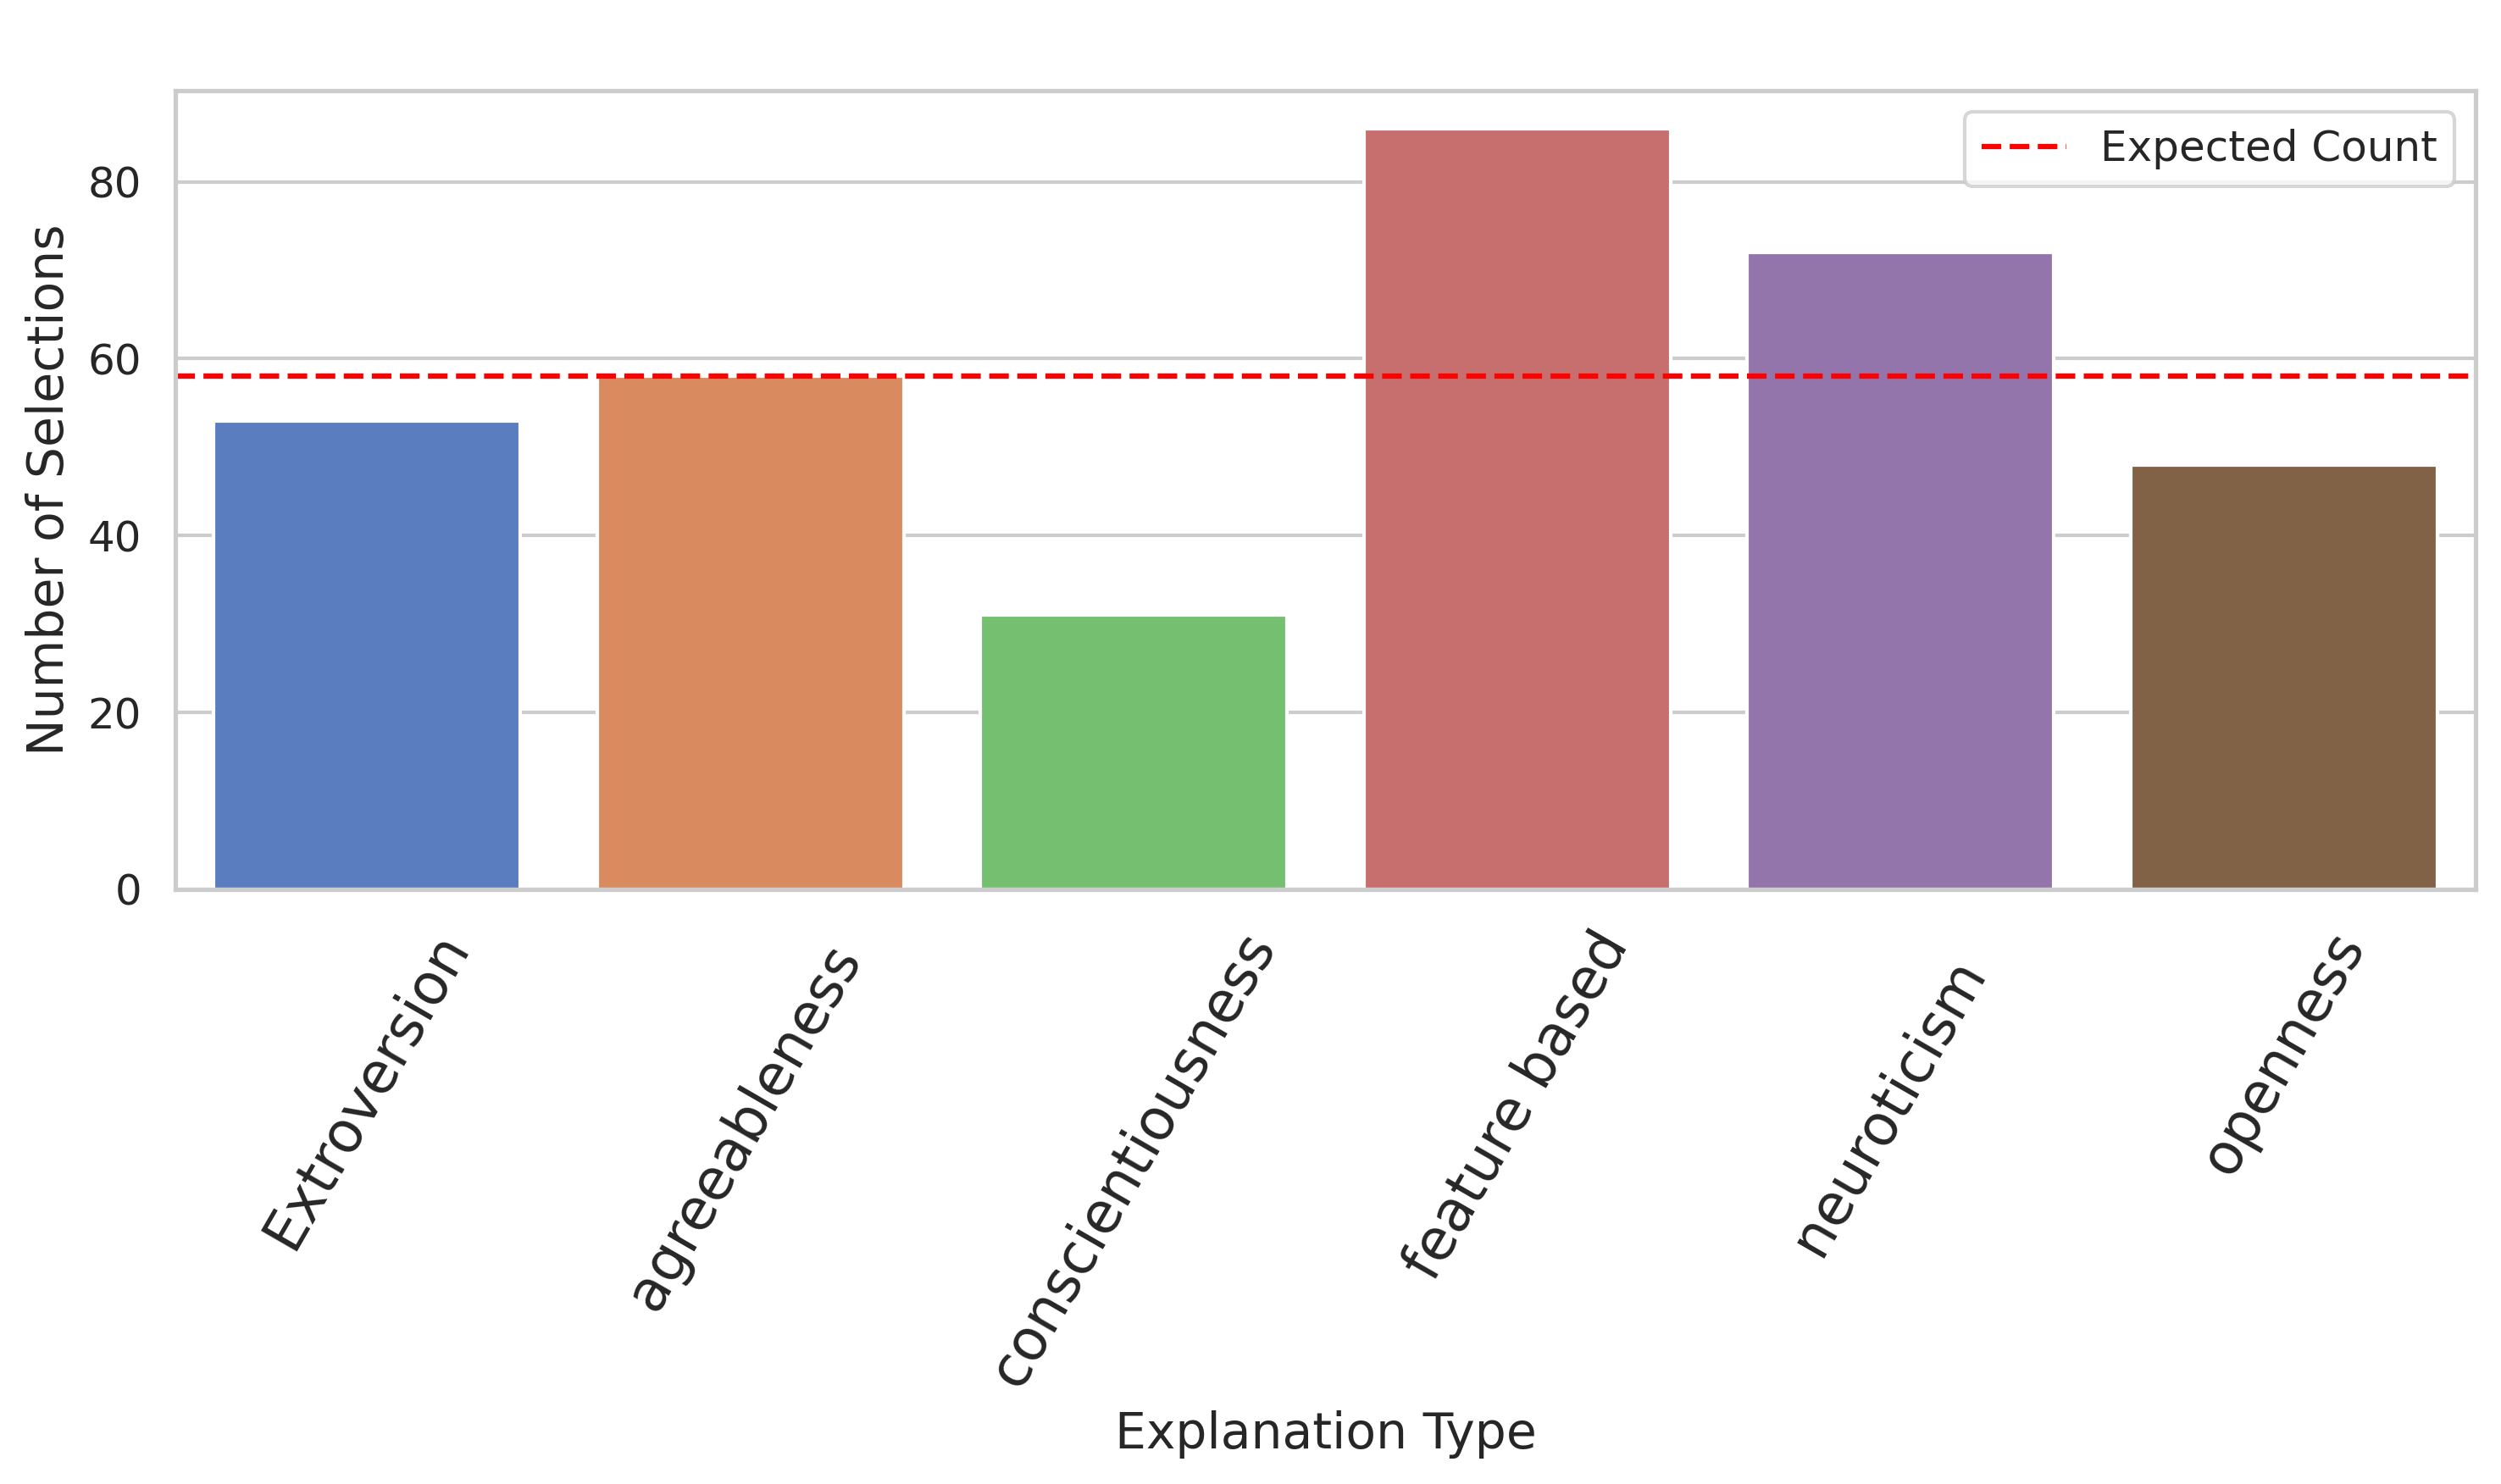

In [18]:

selection_counts = analysis_df['explanation_type'].value_counts().sort_index()
observed_counts = selection_counts.values
labels = selection_counts.index.tolist()


total_responses = observed_counts.sum()
expected_counts = [total_responses / len(observed_counts)] * len(observed_counts)


chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Chi-square goodness-of-fit test:")
print(f"Chi-square statistic: {chi_stat:.2f}")
print(f"p-value: {p_value:.4f}")

plt.figure(figsize=(10, 6), dpi=300)
sns.set(style="whitegrid")
sns.barplot(x=labels, y=observed_counts,hue=labels, palette="muted")


plt.axhline(y=total_responses / len(observed_counts), color='red', linestyle='--', label='Expected Count')
plt.title(" ", fontsize=16)
plt.xlabel("Explanation Type", fontsize=14)
plt.ylabel("Number of Selections", fontsize=14)
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [12]:


selection_counts = analysis_df['explanation_type'].value_counts().sort_index()
labels = selection_counts.index.tolist()
observed_counts = selection_counts.values

results_table = pd.DataFrame(columns=[
    "Pair", "Chi2 Stat", "Raw p-value", "Corrected p-value", "Significant (Bonferroni)"
])


num_comparisons = len(list(combinations(labels, 2)))


for label1, label2 in combinations(labels, 2):
    count1 = analysis_df['explanation_type'].value_counts().get(label1, 0)
    count2 = analysis_df['explanation_type'].value_counts().get(label2, 0)
    remaining1 = analysis_df.shape[0] - count1
    remaining2 = analysis_df.shape[0] - count2
    contingency_table = np.array([[count1, remaining1], [count2, remaining2]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    corrected_p = min(p * num_comparisons, 1.0)
    significant = corrected_p < 0.05
    raw_p_fmt = f"{p:.4f}"
    corrected_p_fmt = f"{corrected_p:.4f}"
    chi2_fmt = f"{chi2:.2f}"

    results_table.loc[len(results_table)] = [
        f"{label1} vs {label2}", chi2_fmt, raw_p_fmt, corrected_p_fmt, significant
    ]


def get_sig_marker(p):
    p = float(p)
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

results_table["Sig"] = results_table["Corrected p-value"].apply(get_sig_marker)


results_table = results_table.sort_values(by="Corrected p-value")
print("Pairwise Chi-Square Results (Bonferroni Corrected):")
print(results_table)


Pairwise Chi-Square Results (Bonferroni Corrected):
                                   Pair Chi2 Stat Raw p-value  \
9    conscientiousness vs feature based     29.96      0.0000   
10   conscientiousness vs neuroticism       18.23      0.0000   
13            feature based vs openness     12.65      0.0004   
2         Extroversion vs feature based      9.21      0.0024   
5   agreeableness  vs conscientiousness      8.71      0.0032   
6       agreeableness  vs feature based      6.38      0.0115   
1     Extroversion vs conscientiousness      5.97      0.0145   
14            neuroticism   vs openness      5.33      0.0210   
11        conscientiousness vs openness      3.66      0.0559   
0        Extroversion vs agreeableness       0.17      0.6788   
3         Extroversion vs neuroticism        3.16      0.0755   
4              Extroversion vs openness      0.19      0.6669   
7       agreeableness  vs neuroticism        1.60      0.2061   
8            agreeableness  vs opennes